<a href="https://colab.research.google.com/github/shambhavi2703/dog_emotion_detection_flask/blob/master/finalmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><H1>MODEL FOR DOG EMOTION PREDICTION</H1></center>
This notebook is about building a model for dog emotion recognition. The model building process involves several steps, including importing the dataset, preprocessing and splitting the data, experimenting with different architectures, training the model, and saving the model. Here are some details about each step:

<h4><u>Importing the dataset:</h4></u> The dataset used in this project is obtained from Kaggle. The dataset contains images of dogs labeled with their corresponding emotions.

<h4><u>Preprocessing and splitting the data:</h4></u> The dataset is preprocessed by resizing the images to a common size and normalizing the pixel values. The data is then split into training, validation, and test sets.

<h4><u>Experimenting with different architectures: </h4></u>Several popular pre-trained deep learning models, such as ResNet50, and InceptionV3, are experimented with to determine the best architecture for the model.

<h4><u>Training the model:</h4></u> The selected architecture is trained using the training data, and the performance of the model is evaluated using the validation data.



In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import  Flatten, Dense, Dropout
from keras.optimizers import Adam
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator

<h3><u>IMPORTING DATASET <h3><u>

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download devzohaib/dog-emotions-prediction


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists
100% 378M/379M [00:17<00:00, 24.3MB/s]
100% 379M/379M [00:17<00:00, 22.5MB/s]


In [ ]:
! unzip dog-emotions-prediction

In [ ]:
angry= 'images/angry/'
sad = 'images/sad/'
relaxed = 'images/relaxed/'
happy = 'images/happy/'

In [ ]:
import os
angry_path = os.listdir(angry)
sad_path = os.listdir(sad)
relaxed_path = os.listdir(relaxed)
happy_path = os.listdir(happy)

In [ ]:
data_path ="images"

<h3><u>SPLITTING AND PREPROCESSING</h3></u>
Imported the ImageDataGenerator module from the Keras library for data augmentation and preprocessing

Used the ImageDataGenerator function to set parameters for data augmentation and splitting for the dataset, such as horizontal flipping, rescaling, and a validation split of 20%

Defined the train and val variables by calling the flow_from_directory function to load the images from the directory, set the target size, batch size, and class mode for both training and validation data




In [ ]:
db_gen =  ImageDataGenerator(horizontal_flip ='true',rescale=1./255, validation_split=0.2)

In [ ]:
train= db_gen.flow_from_directory(
        'images',
        class_mode="binary",
        target_size=(224,224),
        batch_size=98
     )

Found 15921 images belonging to 4 classes.


In [ ]:
val= db_gen.flow_from_directory('images',
                                  class_mode="binary",
                                  target_size=(224, 224),
                                  batch_size=98,
                                  subset="validation"
                                    )

Found 3182 images belonging to 4 classes.


<h3><u>Model Building</h3></u>

> Indented block



This code block imports the InceptionV3 model from the Keras applications module, which has been pre-trained on the ImageNet dataset.

The model is then modified by adding a flatten layer and a dense layer with a sigmoid activation function.

The layers of the InceptionV3 model are set to be non-trainable,here we are freezing the weights of the pre-trained InceptionV3 model so that they are not updated during training of the entire model.The model It is compiled with sparse categorical cross-entropy loss function, the Adam optimizer, and accuracy as the evaluation metric.

<h3><u>InceptionV3 Architecture</h3></u>
<img src="https://production-media.paperswithcode.com/methods/inceptionv3onc--oview_vjAbOfw.png">

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

model = InceptionV3(weights="imagenet", include_top=False, input_shape=(224, 224, 3))



87910968/87910968 [==============================] - 5s 0us/step


In [ ]:
model = Sequential([model,
                    Flatten(),
                    Dense(4, activation="sigmoid")])


In [ ]:
model.layers[0].trainable = False

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten (Flatten)           (None, 51200)             0         
                                                                 
 dense (Dense)               (None, 4)                 204804    
                                                                 
Total params: 22,007,588
Trainable params: 204,804
Non-trainable params: 21,802,784
_________________________________________________________________


In [ ]:
hist = model.fit(train,
                epochs=10,
                validation_data=val)

Epoch 1/10
163/163 [==============================] - 131s 688ms/step - loss: 3.4996 - accuracy: 0.3896 - val_loss: 2.4167 - val_accuracy: 0.3837
Epoch 2/10
163/163 [==============================] - 120s 739ms/step - loss: 2.3986 - accuracy: 0.4644 - val_loss: 2.4861 - val_accuracy: 0.5091
Epoch 3/10
163/163 [==============================] - 99s 608ms/step - loss: 2.0727 - accuracy: 0.5141 - val_loss: 1.6883 - val_accuracy: 0.5644
Epoch 4/10
163/163 [==============================] - 89s 548ms/step - loss: 1.9856 - accuracy: 0.5385 - val_loss: 1.4471 - val_accuracy: 0.6075
Epoch 5/10
163/163 [==============================] - 102s 624ms/step - loss: 2.0667 - accuracy: 0.5520 - val_loss: 1.3866 - val_accuracy: 0.6389
Epoch 6/10
163/163 [==============================] - 100s 615ms/step - loss: 1.7264 - accuracy: 0.5929 - val_loss: 2.1673 - val_accuracy: 0.5519
Epoch 7/10
163/163 [==============================] - 94s 574ms/step - loss: 1.6303 - accuracy: 0.6103 - val_loss: 1.4089 - va

To improve the accuracy of our model, we are going to clone the original model and increase the number of epochs. By doing so, we can test if increasing the number of epochs results in a higher accuracy. This process is known as fine-tuning, where we take a pre-trained model and train it on our specific dataset to improve its performance.

In [ ]:
from tensorflow.keras.models import clone_model

# Clone the model
model2 = clone_model(model)

# Compile the new model
model2.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
hist = model.fit(train,
                epochs=8,
                validation_data=val)

Epoch 1/8
163/163 [==============================] - 90s 553ms/step - loss: 1.1684 - accuracy: 0.7290 - val_loss: 0.6149 - val_accuracy: 0.8187
Epoch 2/8
163/163 [==============================] - 90s 552ms/step - loss: 1.0255 - accuracy: 0.7573 - val_loss: 1.1029 - val_accuracy: 0.7291
Epoch 3/8
163/163 [==============================] - 89s 549ms/step - loss: 0.9538 - accuracy: 0.7658 - val_loss: 0.6873 - val_accuracy: 0.8111
Epoch 4/8
163/163 [==============================] - 89s 549ms/step - loss: 0.8595 - accuracy: 0.7846 - val_loss: 0.7232 - val_accuracy: 0.8055
Epoch 5/8
163/163 [==============================] - 89s 547ms/step - loss: 0.8479 - accuracy: 0.7797 - val_loss: 0.6015 - val_accuracy: 0.8341
Epoch 6/8
163/163 [==============================] - 90s 554ms/step - loss: 0.9313 - accuracy: 0.7734 - val_loss: 0.6127 - val_accuracy: 0.8363
Epoch 7/8
163/163 [==============================] - 88s 538ms/step - loss: 0.9873 - accuracy: 0.7671 - val_loss: 0.7610 - val_accuracy:

We were able to achieve a val accuracy of 85% , which is pretty decent .

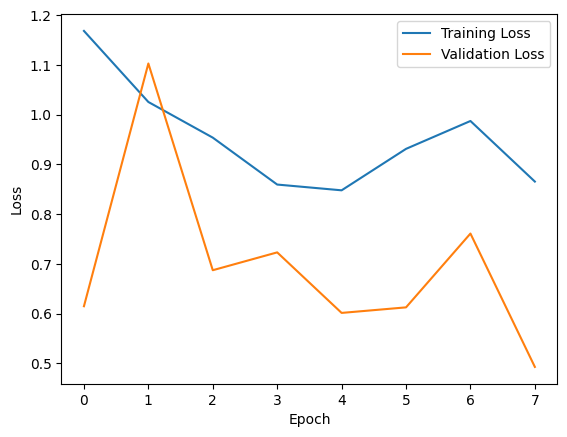

In [ ]:
import matplotlib.pyplot as plt

# Get the training history
history = hist.history

# Plot the training and validation loss curves
plt.plot(history['loss'], label='Training Loss')
plt.plot(history['val_loss'], label='Validation Loss')

# Add axis labels and legend
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Show the plot
plt.show()



In [ ]:
from tensorflow.keras.models import save_model

# Save the entire model
save_model(model, 'model.h5')

In [ ]:
from tensorflow.keras.models import save_model

# Save the entire model
save_model(model, 'model2.h5')

In [ ]:
from tensorflow.keras.models import save_model

# Save the entire model
save_model(model, 'C:/Users/shamb/OneDrive/Desktop/dog emotions/model.h5')


In [ ]:
# Save the entire model
save_model(model, 'C:/Users/shamb/OneDrive/Desktop/dog emotions/model2.h5')

<h3><u>CALLING THE MODEL TO MAKE PREDICTION<h3><u>

In [ ]:
from tensorflow.keras.models import load_model
# Load the saved model
model = load_model('model2.h5')





In [ ]:
# Ask user to upload image file
from google.colab import files
uploaded_file = files.upload()

Saving testcase.jpg to testcase (1).jpg


In [ ]:

# Get the file name of the uploaded image
import io
filename = list(uploaded_file.keys())[0]
filename

'testcase.jpg'

In [ ]:
# Read the image file and convert to numpy array
from PIL import Image

img = Image.open(io.BytesIO(uploaded_file[filename]))
img = img.resize((224,224))
img_array = np.array(img)/255.

In [ ]:
# Make prediction on the image
prediction = model.predict(np.expand_dims(img_array, axis=0))

1/1 [==============================] - 0s 27ms/step


In [ ]:
class_names = ['angry', 'sad','relaxed','happy']



In [ ]:
# Get the predicted class index
predicted_class = np.argmax(prediction)

In [ ]:
# Print the predicted class label
print(f"Predicted class: {class_names[predicted_class]}")

Predicted class: angry
